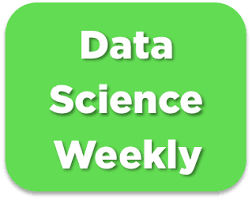

## Projet 🚧

Les data scientists qui ont créé la newsletter aimeraient mieux comprendre le comportement des utilisateurs visitant leur site web. Ils aimeraient savoir s'il est possible de construire un modèle qui prédit si un utilisateur donné s'abonnera à la newsletter, en utilisant simplement quelques informations sur l'utilisateur. Ils aimeraient analyser les paramètres du modèle pour mettre en évidence les caractéristiques importantes expliquant le comportement des utilisateurs, et peut-être découvrir un nouveau levier d'action pour améliorer le taux de conversion de la newsletter.

Ils ont conçu une compétition visant à construire un modèle permettant de prédire les conversions (c'est-à-dire quand un utilisateur s'abonnera à la newsletter). Pour ce faire, ils ont publié un ensemble de données contenant quelques données sur le trafic sur leur site web. Pour évaluer les classements des différentes équipes concurrentes, ils ont décidé d'utiliser le **score F1**.

## Objectifs 🎯

Le projet peut être découpé en quatre étapes :

* Partie 1 : réaliser une analyse exploratoire des données (EDA), effectuer les prétraitements et entraîner un modèle de base avec le fichier data_train.csv
* Partie 2 : améliorer le score F1 de votre modèle sur votre ensemble de test (vous pouvez essayer l'ingénierie des caractéristiques, la sélection des caractéristiques, la régularisation, les modèles non linéaires, l'optimisation des hyperparamètres par recherche en grille, etc...)
* Partie 3 : Une fois satisfait du score de votre modèle, vous pouvez l'utiliser pour faire des prédictions avec le fichier data_test.csv. Vous devrez enregistrer les prédictions dans un fichier .csv qui sera envoyé à Kaggle (en fait, à votre professeur/assistant 🤓). Vous pouvez faire autant de soumissions que vous le souhaitez, n'hésitez pas à essayer différents modèles !
* Partie 4 : Prenez un certain temps pour analyser les paramètres de votre meilleur modèle. Y a-t-il des leviers d'action qui pourraient aider à améliorer le taux de conversion de la newsletter ? Quelles recommandations feriez-vous à l'équipe ?

## Livrable 📬

Pour mener à bien ce projet, votre équipe devrait :

* Créer des figures pertinentes pour l'EDA
* Entraîner au moins un modèle qui prédit les conversions et évaluer ses performances (score F1, matrices de confusion)
* Faire au moins une soumission au classement
* Analyser les paramètres de votre meilleur modèle et essayer de faire des recommandations pour améliorer le taux de conversion à l'avenir



## Défi : prédire les conversions 🏆🏆

Voici le modèle qui présente les différentes étapes du défi. Dans ce notebook, toutes les étapes d'entraînement/prédiction sont implémentées pour un modèle très basique (régression logistique avec une seule variable). Veuillez utiliser ce modèle et n'hésitez pas à modifier les étapes de prétraitement/entraînement pour obtenir le modèle avec le meilleur score F1 ! Que la force soit avec vous 🧨🧨

# Libraries importées

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [2]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explorer le dataset et retirer les outliers

In [4]:
# Le dataset est plutôt grand : Il faut créer un sample avant de faire les visualisations
data_sample = data.sample(10000)

In [5]:
#  Basiques stats
print("Number of rows : {}".format(data_sample.shape[0]))
print()

print("Display of dataset: ")
display(data_sample.head())
print()

print("Basics statistics: ")
data_desc = data_sample.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data_sample.isnull().sum()/data_sample.shape[0])

Number of rows : 10000

Display of dataset: 


,country,age,new_user,source,total_pages_visited,converted
161257,UK,34,1,Direct,1,0
114526,China,29,1,Direct,6,0
188487,US,37,0,Seo,4,0
265755,US,39,1,Ads,10,0
68944,China,17,0,Seo,10,0



Basics statistics: 


,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5624,NaN,NaN,4903,NaN,NaN
mean,NaN,30.540000,0.688000,NaN,4.901300,0.032600
std,NaN,8.309302,0.463333,NaN,3.389824,0.177596
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000



Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

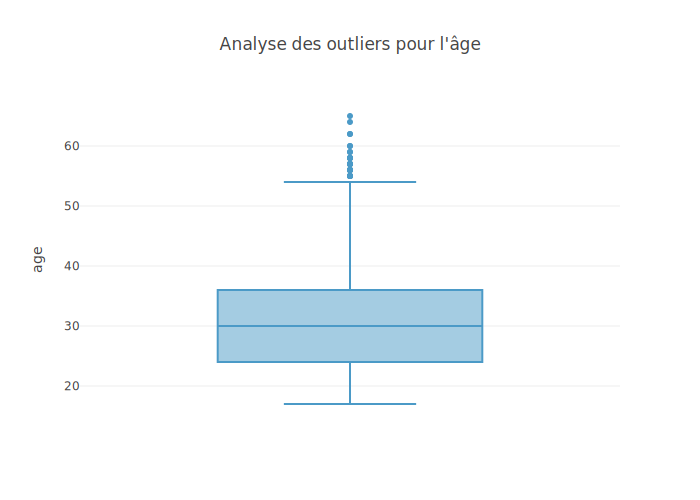

In [6]:
# Graphe déterminant les éventuels outliers
fig = px.box(data_sample, y='age', title="Analyse des outliers pour l'âge")
fig.show()

 Les utilisateurs majoritaires ont entre 20 et 40 ans, avec des outliers au-delà de 60 ans pouvant indiquer des erreurs ou des segments moins représentés

In [7]:
# Suppression des outliers dont la tranche d'age n'est pas dans la clientèle cible 
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df = df[np.abs(df[column] - mean) <= (3 * std)]
    return df

data = remove_outliers(data, 'age')

print("Nombre de données après suppression des outliers:", len(data))

Nombre de données après suppression des outliers: 283563


# EDA

### Analyse globale par graphes selon le nombre de pages visitées 

Commençons par analyser la corrélations de la feature du nombre de page visités et son taux de conversion afin d'avoir une vision globale du dataset.

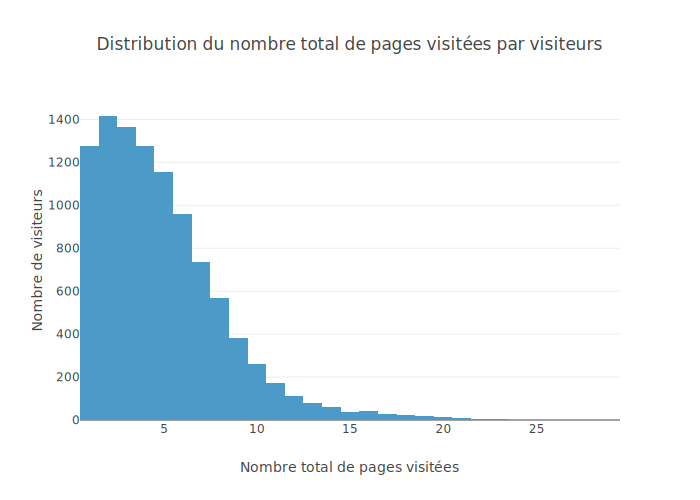

In [8]:
fig = px.histogram(data_sample, x='total_pages_visited',
                   title='Distribution du nombre total de pages visitées par visiteurs')
fig.update_layout(
    xaxis_title='Nombre total de pages visitées',  
    yaxis_title='Nombre de visiteurs')
fig.show()

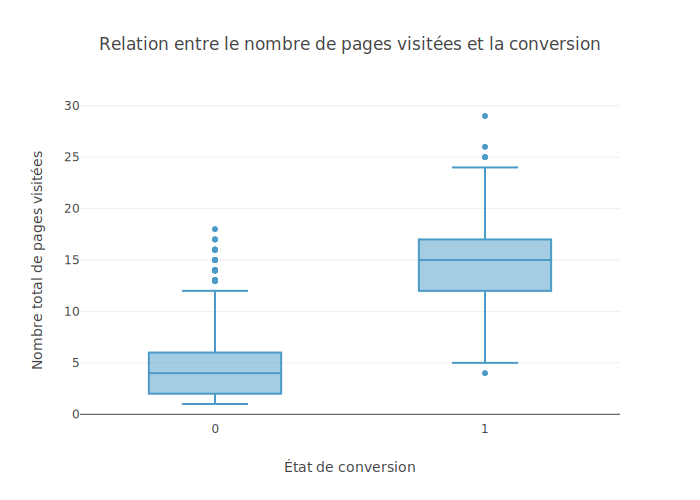

In [9]:
fig = px.box(data_sample, x='converted', y='total_pages_visited',
             title='Relation entre le nombre de pages visitées et la conversion')

fig.update_layout(
    xaxis_title='État de conversion',
    yaxis_title='Nombre total de pages visitées')
fig.show()

L'analyse montre que les utilisateurs visitant plus de pages sont plus susceptibles de s'abonner, reflétant des tendances macro-économiques comme l'expansion de l'e-commerce et l'évolution des comportements en ligne. Dans notre modele, le nombre de pages visitées représente une feature clé. En corrigeant son asymétrie et en explorant ses interactions avec d'autres variables, nous pouvons améliorer la précision des modèles prédictifs et optimiser les stratégies pour augmenter le taux de conversion de la newsletter.

### Analyse des nouveaux utilisateurs VS utilisateurs existants. 

Concentrons notre analyse sur la typologie des utilisateurs de façon à identifier la disparité des profils selon l' ancienneté, l'age et les influences/habitudes d'intégraction avec le site web.

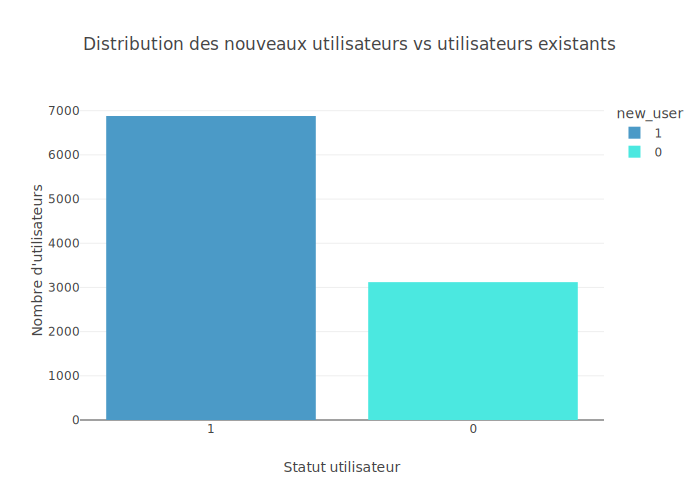

In [10]:
fig = px.histogram(data_sample, x='new_user', color='new_user',
                   title='Distribution des nouveaux utilisateurs vs utilisateurs existants')
fig.update_layout(
    xaxis_title= 'Statut utilisateur',
    yaxis_title= "Nombre d'utilisateurs")
fig.update_xaxes(type='category')
fig.show()

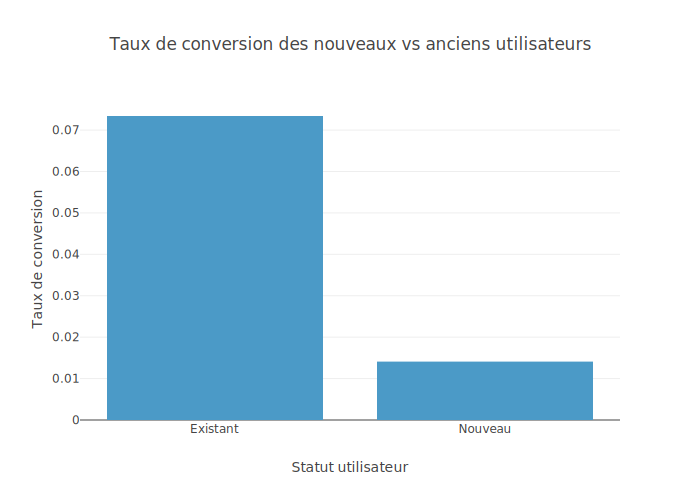

In [11]:
conversion_rates = data_sample.groupby('new_user')['converted'].mean().reset_index()
conversion_rates['new_user'] = conversion_rates['new_user'].map({0: 'Existant', 1: 'Nouveau'})

fig = px.bar(conversion_rates, x='new_user', y='converted',
             title='Taux de conversion des nouveaux vs anciens utilisateurs')
fig.update_layout(
    xaxis_title= 'Statut utilisateur',
    yaxis_title= "Taux de conversion")
fig.show()

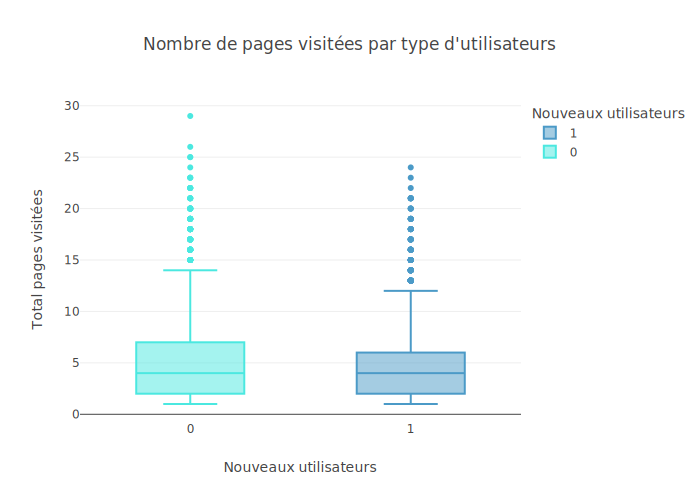

In [12]:
fig = px.box(data_sample, x='new_user', y='total_pages_visited', color='new_user',
             labels={'new_user': 'Nouveaux utilisateurs', 'total_pages_visited': 'Total pages visitées'},
             title="Nombre de pages visitées par type d'utilisateurs")
fig.show()

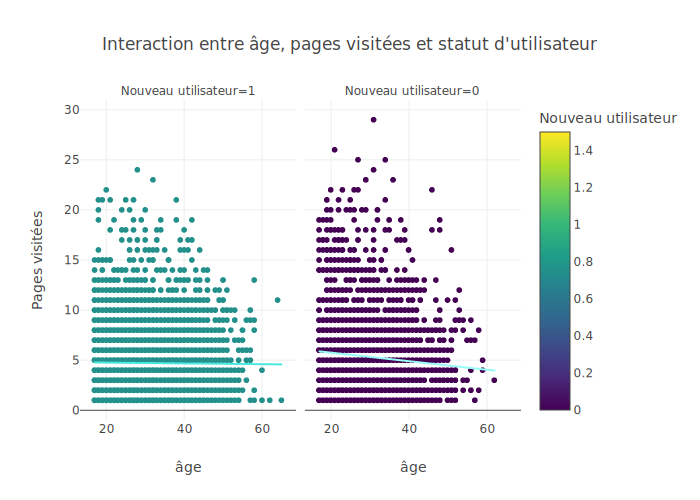

In [13]:
fig = px.scatter(data_sample, x='age', y='total_pages_visited', color='new_user',
                 labels={'new_user': 'Nouveau utilisateur', 'age': 'âge', 'total_pages_visited': 'Pages visitées'},
                 title="Interaction entre âge, pages visitées et statut d'utilisateur",
                 facet_col='new_user', trendline='ols')
fig.show()

L'analyse montre que les utilisateurs existants, bien que moins nombreux que les nouveaux utilisateurs, ont un taux de conversion significativement plus élevé, ce qui indique une plus grande confiance et engagement. Les utilisateurs existants naviguent davantage sur le site, augmentant ainsi leur probabilité de conversion. 

Les jeunes utilisateurs, qu'ils soient nouveaux ou existants, sont plus actifs en termes de pages visitées. Ces comportements, influencés par l'adoption technologique croissante et la fidélisation client, doivent être intégrés dans les modèles prédictifs. En incluant des variables telles que le statut de l'utilisateur, le nombre de pages visitées et l'âge, nous pouvons améliorer la précision des prédictions et optimiser les stratégies pour augmenter les taux de conversion de la newsletter.

### Analyse de graphes  par pays de provenance

Désormais, après avoir identifié certaines typologies et habitudes dans la section précédente, il serait intéressant de segmenter l'analyse par pays de connexion afin d'affiner notre compréhension des visiteurs et de la répartition internationale.

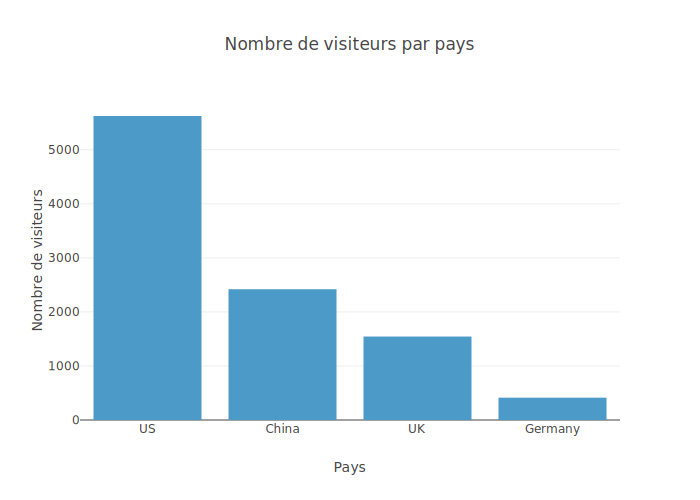

In [14]:
country_counts = data_sample['country'].value_counts()
fig = px.bar(country_counts, title='Nombre de visiteurs par pays', labels={'value': 'Nombre de visiteurs', 'index': 'Pays'})
fig.update_layout(showlegend=False)
fig.show()

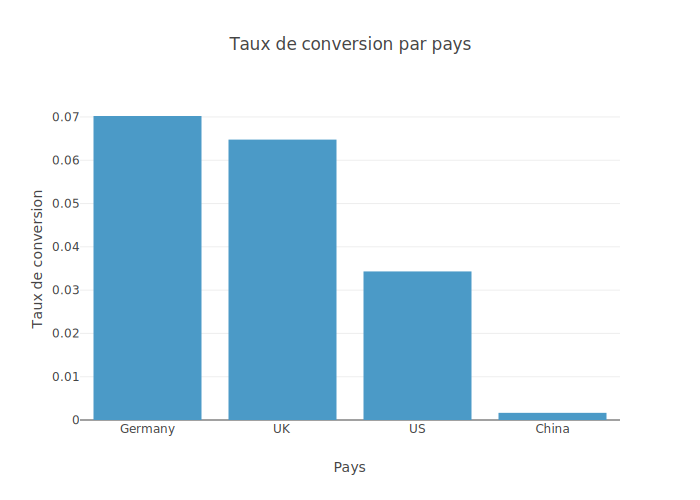

In [15]:
conversion_rate = data_sample.groupby('country')['converted'].mean().sort_values(ascending=False)

fig = px.bar(conversion_rate, title='Taux de conversion par pays', labels={'value': 'Taux de conversion', 'index': 'Pays'})
fig.update_layout(xaxis_title='Pays', yaxis_title='Taux de conversion', showlegend=False)
fig.show()

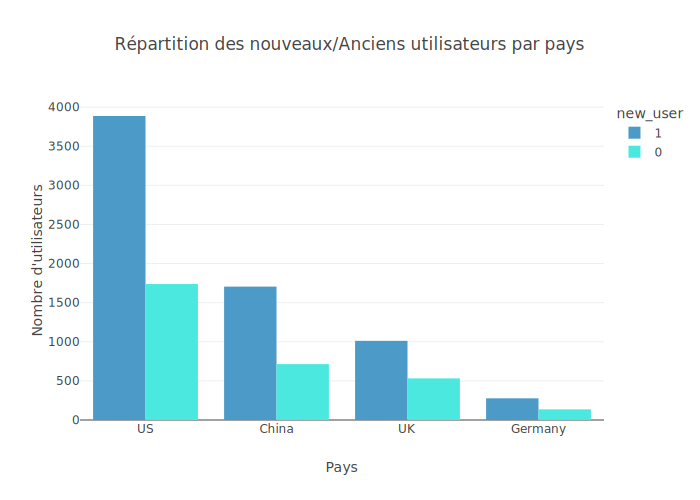

In [16]:
fig = px.histogram(data_sample, x='country', color='new_user',
                   barmode='group',
                   title='Répartition des nouveaux/Anciens utilisateurs par pays',
                   category_orders={"Nouveaux_utilisateur": ["0", "1"]})

fig.update_layout(xaxis_title='Pays', yaxis_title="Nombre d'utilisateurs")
fig.update_xaxes(categoryorder='total descending')

fig.show()

L'analyse montre que les États-Unis ont le plus grand nombre de visiteurs, principalement des nouveaux utilisateurs, mais un taux de conversion modéré. En revanche, l'Allemagne, avec moins de visiteurs, présente le taux de conversion le plus élevé et une proportion équilibrée de nouveaux et anciens utilisateurs. La Chine, bien qu'ayant beaucoup de nouveaux utilisateurs, affiche le taux de conversion le plus bas. Ces différences reflètent des facteurs macro-économiques comme la maturité du marché numérique et la confiance des consommateurs. Intégrer ces variables géographiques dans les modèles prédictifs peut améliorer la précision et permettre de cibler des stratégies de conversion adaptées à chaque marché.

### Analyse de graphes par liens sources 

Enfin, comprendre les différentes sources de trafic et leurs taux de conversion est un élément indispensable dans le cadre d'une stratégie marketing de SEO/SEA efficace pour ce type de business. Elle consistera à une variable primordiale dans le cadre de l'entrainement et des prédictions de notre modèle.

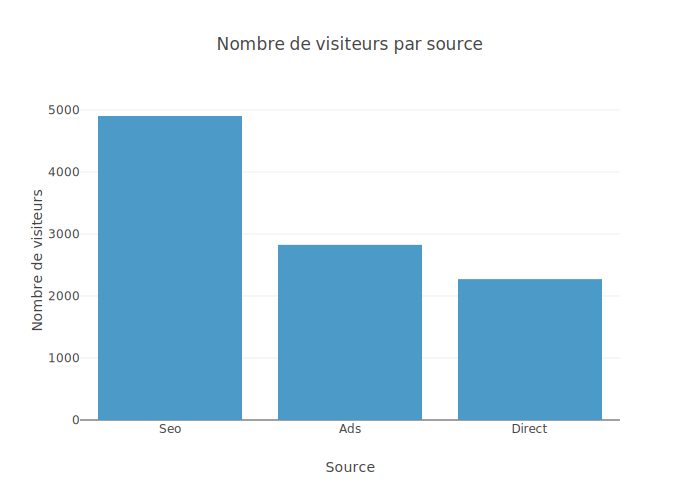

In [17]:
source_counts = data_sample['source'].value_counts()
fig = px.bar(source_counts, title='Nombre de visiteurs par source', labels={'value': 'Nombre de visiteurs', 'index': 'Source'})
fig.update_layout(showlegend=False)
fig.show()

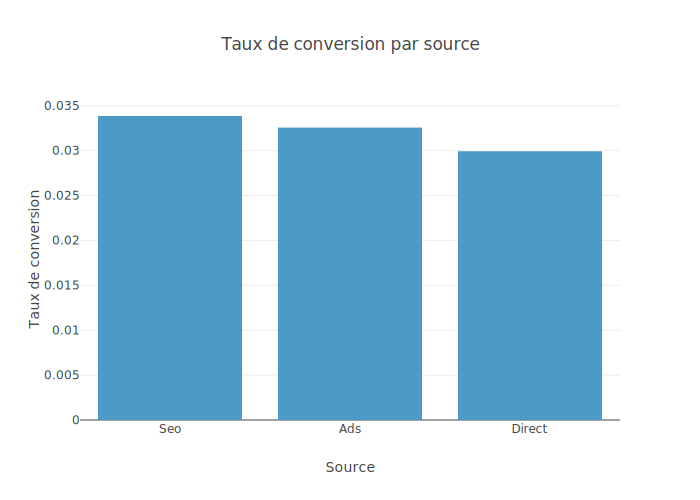

In [18]:
conversion_rate = data_sample.groupby('source')['converted'].mean().sort_values(ascending=False)

fig = px.bar(conversion_rate, title='Taux de conversion par source',
           labels={'value': 'Taux de conversion', 'index': 'Source'})
fig.update_xaxes(title='Source')
fig.update_layout(showlegend=False)
fig.show()

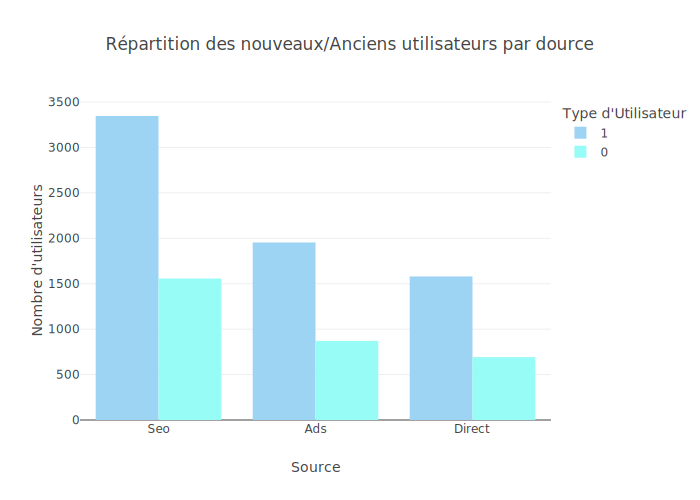

In [19]:
fig = px.histogram(data_sample, x='source', color='new_user',
                   barmode='group',
                   labels={'new_user': "Type d'Utilisateur", 'source': 'Source'},
                   title='Répartition des nouveaux/Anciens utilisateurs par dource',
                   category_orders={"new_user": ["0", "1"]})

fig.update_xaxes(categoryorder='total descending')
fig.update_yaxes(title_text="Nombre d'utilisateurs") 
fig.show()

L'analyse des sources de trafic montre que le SEO génère le plus de visiteurs, principalement des nouveaux utilisateurs, suivi par les publicités et le trafic direct. Le trafic direct, qui comprend une proportion plus élevée d'utilisateurs fidèles, affiche un taux de conversion plus élevé. Ces tendances sont influencées par les stratégies de marketing digital et l'optimisation des moteurs de recherche. Corrélant avec nos analyses précédentes, nous constatons que, bien que nombreux, les nouveaux utilisateurs via SEO ont un taux de conversion plus faible comparé aux utilisateurs existants, soulignant l'importance de l'engagement et de la fidélité.

intégrer les variables de source de trafic est crucial pour segmenter les utilisateurs et optimiser les modèles prédictifs. En effet, comprendre que les nouveaux utilisateurs arrivant par SEO nécessitent des stratégies de conversion différentes de celles des utilisateurs fidèles provenant du trafic direct, pouvent permettre de développer des campagnes marketing ciblées et des parcours utilisateurs personnalisés. 

Ces actions permettront d'augmenter le taux de conversion global, en s'appuyant sur des insights précis et une segmentation efficace des comportements des utilisateurs.

# Création de modele (Modèle modifié du template proposé)

## Choisissez les variables à utiliser dans le modèle et créez des ensembles d'entraînement et de test
À partir de l'EDA, nous avons identifié et expliqués l'importances des caractéristiques country', 'age', 'new_user', 'source', 'total_pages_visited'. Contrairement au template de base proposé, nous allons modifier le modèle de référence en utilisant l'ensemble des caractéristiques : dans les cellules suivantes, nous effectuerons des prétraitements et entraînerons une régression logistique simple améliorée par rapport au template de base (et nous détaillerons les ajouts/améliorations réalisés).

In [20]:
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [21]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [22]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Training et test de pipeline (retravaillé et amélioré)

### Améliorations apportées dans le préprocessing du template

* Imputation des données manquantes pour les caractéristiques numériques : L'ajout de SimpleImputer(strategy='median') permet d'imputer les valeurs manquantes des caractéristiques numériques avec la médiane des valeurs existantes. Cette approche renforce la robustesse du modèle face aux données manquantes et assure une cohérence dans les données d'entraînement et de test.
Encodage des caractéristiques catégoriques

* L'intégration de OneHotEncoder(handle_unknown='ignore') pour les caractéristiques catégoriques transforme ces variables en un format utilisable par les algorithmes de machine learning. Cela permet au modèle de tirer pleinement parti de l'information contenue dans les variables catégoriques, améliorant ainsi la précision des prédictions.
Pipeline de prétraitement unifiée

* L'utilisation de ColumnTransformer pour combiner les prétraitements des caractéristiques numériques et catégoriques en une seule pipeline structurée améliore la modularité et la maintenabilité du processus de prétraitement. Cette unification garantit que toutes les transformations nécessaires sont appliquées de manière ordonnée et cohérente.
Pipeline complète pour entraînement et prédiction

* La mise en place d'une pipeline complète (Pipeline) intégrant à la fois les étapes de prétraitement et le modèle de régression logistique assure une cohérence totale entre les phases d'entraînement et de prédiction. Cela garantit que les données de test sont traitées de la même manière que les données d'entraînement, améliorant ainsi la fiabilité des prédictions.
Extraction des coefficients et de l'interception du modèle

* L'accès facilité aux coefficients et à l'interception du modèle de régression logistique après l'entraînement (pipeline.named_steps['classifier'].coef_ et pipeline.named_steps['classifier'].intercept_) offre une meilleure compréhension de l'impact de chaque caractéristique sur les prédictions. Cette transparence aide à interpréter et à expliquer les résultats du modèle de manière plus détaillée.

Ces améliorations augmentent considérablement la robustesse, la précision et la transparence du modèle de régression logistique. L'intégration d'une pipeline complète pour le prétraitement et la modélisation, ainsi que l'ajout de techniques avancées de traitement des données, positionnent ce modèle comme une solution plus efficace et interprétable pour les tâches de classification.

In [23]:
print("Configuration de la pipeline de prétraitement et d'entraînement...")

# Prétraitement pour les données numériques
numeric_features = ['age', 'total_pages_visited']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputer les valeurs manquantes
    ('scaler', StandardScaler())])

# Prétraitement pour les données catégoriques
categorical_features = ['country', 'source']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Gérer les valeurs manquantes éventuelles
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Regrouper les prétraitements pour les données numériques et catégoriques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Définir le modèle
model = LogisticRegression()

# Créer et configurer la pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
print("...Terminé.")

Configuration de la pipeline de prétraitement et d'entraînement...
...Terminé.


In [24]:
print("Entrainement du modele...")
pipeline.fit(X_train, Y_train)
print("...Terminé.")

Entrainement du modele...


...Terminé.


In [25]:
# Accéder au modèle de régression logistique
logistic_model = pipeline.named_steps['classifier'] 

# Obtenir les coefficients et l'interception

coefficients = logistic_model.coef_[0] 

intercept = logistic_model.intercept_[0] 

print("Coefficients :", coefficients)
print("Interception :", intercept)

Coefficients : [-0.60045915  2.54565551 -2.6981442   1.10917837  0.96569019  0.61110272
  0.07436289 -0.13218275  0.04564694]
Interception : -7.202137899419751


#### Interprétation des coefficients
Les coefficients  indiquent qu'une augmentation d'un an en âge diminue la probabilité de conversion de 0.60, alors qu'une page supplémentaire visitée augmente cette probabilité de 2.55. 

Les catégories spécifiques de pays et de sources avec des coefficients positifs suggèrent une influence favorable sur la conversion, contrairement aux catégories avec des coefficients négatifs. 

L'intercept à -7.20 implique une probabilité de base très faible de conversion quand aucune autre caractéristique n'est présente.  

In [26]:
print("Prédictions sur l'ensemble d'entraînement...")
Y_train_pred = pipeline.predict(X_train)
print("...Terminé.")

print("Prédictions sur l'ensemble de test...")
Y_test_pred = pipeline.predict(X_test)
print("...Terminé.")


Prédictions sur l'ensemble d'entraînement...
...Terminé.
Prédictions sur l'ensemble de test...
...Terminé.


## Évaluation des performances

Etant donnée que la prediction demandée est un score F1 et que le template de base proposait déjà les variables de prédiction sur le sujet ainsi qu'une matrice de confusion.  Aucune modification n'a été effectuée dans cette section.

In [27]:
# ATTENTION : Utilisez le même score que celui qui sera utilisé par Kaggle !
# Ici, le f1-score sera utilisé pour évaluer les performances sur le leaderboard
print("f1-score sur l'ensemble d'entraînement :", f1_score(Y_train, Y_train_pred))
print("f1-score sur l'ensemble de test :", f1_score(Y_test, Y_test_pred))

f1-score sur l'ensemble d'entraînement : 0.7351517479830963
f1-score sur l'ensemble de test : 0.7282208588957055


**Nous pouvons constater que ce modele incluant toutes les variables a un meilleur score que le template original dont les scores sont les suivants :**

"f1-score on train set :  0.6938517686692869

f1-score on test set :  0.7060240963855423"


In [28]:
# Vous pouvez également vérifier d'autres métriques de performance pour mieux comprendre ce que fait votre modèle
print("Matrice de confusion sur l'ensemble d'entraînement :")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Matrice de confusion sur l'ensemble de test :")
print(confusion_matrix(Y_test, Y_test_pred))
print()


Matrice de confusion sur l'ensemble d'entraînement :
[[218619    897]
 [  2550   4784]]

Matrice de confusion sur l'ensemble de test :
[[54640   234]
 [  652  1187]]



Notre modèle amélioré montre  une meilleure performance que le modèle de base, tant sur l'ensemble d'entraînement que sur l'ensemble de test.
Les nombres de vrais positifs et de vrais négatifs ont augmenté dans le modèle amélioré, tandis que les faux positifs et les faux négatifs ont diminué, ce qui indique une amélioration globale de la précision et de la sensibilité du modèle.

En comparaison, le modèle de base montre des performances légèrement inférieures avec des nombres de faux positifs et de faux négatifs relativement plus élevés:

matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]

 **Ces résultats suggèrent que les modifications apportées au modèle ont conduit à une amélioration significative de sa capacité à classer correctement les données, ce qui le rend plus fiable pour la tâche de classification.**

# Ajout d'un GridSearch

#### Raison d'un GridSearch

Le grid search optimise les hyperparamètres, améliore la précision et la robustesse du modèle. En testant différentes valeurs pour la régularisation, les solveurs, et les stratégies d'imputation, nous obtenons des prédictions plus précises et un modèle plus fiable.

#### Paramètres du Grid Search choisis

* classifier__C : Le paramètre C est un coefficient de régularisation dans la régression logistique. Une petite valeur de C (e.g., 0.01) implique une régularisation plus forte, tandis qu'une grande valeur de C (e.g., 100) implique une régularisation plus faible. Tester différentes valeurs permet de trouver le bon équilibre entre biais et variance.
* classifier__solver : Le solveur lbfgs est utilisé ici. C'est une approximation de la méthode de Newton, adaptée aux grands ensembles de données. Il est considéré comme un bon choix par défaut pour la régression logistique.
* preprocessor__num__imputer__strategy : Stratégies d'imputation pour les données numériques. Nous testons l'imputation par la moyenne (mean) et par la médiane (median). Cela permet de voir quelle stratégie d'imputation donne les meilleurs résultats.

#### Bénéfices du Grid Search

* Optimisation des Hyperparamètres : Identification des meilleures combinaisons pour améliorer la performance du modèle.
* Régularisation Adaptée : Ajustement optimal pour équilibrer biais et variance.
* Solveur Efficace : lbfgs assure robustesse et efficacité sur de grandes données.
* Meilleure Imputation : Choix optimal entre mean et median pour des prédictions plus précises.

In [29]:
# paramètres Grid Search
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs'],
    'preprocessor__num__imputer__strategy': ['mean', 'median'],  #Imputation strategies for numerical data
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1)

print("Running grid search...")
grid_search.fit(X_train, Y_train)
print("Grid search complete.")

Running grid search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Grid search complete.


In [30]:
# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur f1-score :", grid_search.best_score_)


Meilleurs paramètres : {'classifier__C': 10, 'classifier__solver': 'lbfgs', 'preprocessor__num__imputer__strategy': 'mean'}
Meilleur f1-score : 0.7349080781479895


In [31]:
# Utiliser le meilleur modèle trouvé pour faire des prédictions sur l'ensemble de test.
print("Prédictions sur l'ensemble de test avec le meilleur modèle...")
Y_test_pred = grid_search.predict(X_test)
print("...Terminé.")

print("f1-score sur l'ensemble de test avec le meilleur modèle :", f1_score(Y_test, Y_test_pred))

Prédictions sur l'ensemble de test avec le meilleur modèle...
...Terminé.
f1-score sur l'ensemble de test avec le meilleur modèle : 0.7282208588957055


In [32]:
print("Confusion matrix on test set with best model: ")
print(confusion_matrix(Y_test, Y_test_pred))

Confusion matrix on test set with best model: 
[[54640   234]
 [  652  1187]]


Le gridsearch ne semble pas avoir améliorer les performances du model sur cette exemple toutefois l'ajustement des hyperparamètres ou de la complexité du modèle  pourrait améliorer les performances sur l'ensemble de test.

# Arbre de décisions

Maintenant, nous allons voir si l'arbre de décisions, un autre modele de classification pourrait proposer de meilleurs performance. Nous allons l'appliquer normalement puis le coupler à un Gridsearch pour améliorer ses résultats. 

In [33]:
# Définir le modèle de Decision Tree classique
model_tree = DecisionTreeClassifier(random_state=42)

# Créer et configurer le pipeline
pipeline_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', model_tree)])

# Entraîner le modèle de Decision Tree classique
print("Training classic Decision Tree model...")
pipeline_tree.fit(X_train, Y_train)
print("...Done.")

Training classic Decision Tree model...
...Done.


In [34]:
# Faire des prédictions sur l'ensemble de test avec le modèle classique
Y_test_pred_tree = pipeline_tree.predict(X_test)
print("f1-score on test set with classic Decision Tree model: ", f1_score(Y_test, Y_test_pred_tree))



f1-score on test set with classic Decision Tree model:  0.6935081148564295


In [35]:
# Afficher la matrice de confusion pour l'ensemble de test
print("Confusion matrix on test set with classic Decision Tree model: ")
print(confusion_matrix(Y_test, Y_test_pred_tree))

Confusion matrix on test set with classic Decision Tree model: 
[[54620   254]
 [  728  1111]]


Le modèle Decision Tree a un f1-score inférieur par rapport aux autres modèles, indiquant une performance globale plus faible.

# Arbre de decision (Avec GridSearch)

En définissant une grille d'hyperparamètres et en utilisant GridSearchCV, nous explorons systématiquement un large éventail de configurations possibles pour le Decision Tree. Cela nous permet de trouver la combinaison optimale qui maximise les performances du modèle tout en réduisant les risques de surajustement et en améliorant la capacité de généralisation.

* max_depth : Limite la profondeur de l'arbre pour équilibrer la complexité et l'overfitting surajustement.

* min_samples_split : Nombre minimum d'échantillons pour diviser un nœud avec des valeurs standarts permettant de prévenir des divisions trop fines.

* min_samples_leaf : Nombre minimum d'échantillons par nœud feuille pour réduire la complexité du modele.

* criterion : Critère de qualité des divisions avec deux Valeurs standarts : 'Gini', 'Entropy'.

In [36]:
# Définir la grille des hyperparamètres pour le Decision Tree
param_grid = {
    'classifier__max_depth': [5, 10, 15, 20, 25],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(pipeline_tree, param_grid, cv=5, scoring='f1', verbose=1)

In [37]:
# Exécuter le grid search pour trouver les meilleurs hyperparamètres
print("Running grid search for Decision Tree...")
grid_search.fit(X_train, Y_train)
print("Grid search complete.")
print("Best parameters:", grid_search.best_params_)
print("Best f1-score:", grid_search.best_score_)

Running grid search for Decision Tree...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Grid search complete.
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best f1-score: 0.7317424149270579


In [38]:
# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
Y_test_pred = grid_search.predict(X_test)
print("f1-score on test set with best Decision Tree model: ", f1_score(Y_test, Y_test_pred))

f1-score on test set with best Decision Tree model:  0.7279236276849642


In [39]:
# Afficher la matrice de confusion pour l'ensemble de test
print("Confusion matrix on test set with best Decision Tree model: ")
print(confusion_matrix(Y_test, Y_test_pred))

Confusion matrix on test set with best Decision Tree model: 
[[54581   293]
 [  619  1220]]


Le modèle optimisé du decision tree par Grid Search montre une nette amélioration, mais reste légèrement inférieur aux modèles logistiques.

#### Selection du modele

Les modèles logistiques, qu'ils soient optimisés ou non, surpassent les modèles Decision Tree dans ce contexte. L'optimisation des hyperparamètres via Grid Search a apporté une amélioration notable pour le Decision Tree, mais pas suffisamment pour le rendre compétitif par rapport aux modèles logistiques. Par conséquent, le modèle logistique normal reste le choix le plus performant pour ce problème, avec un bon équilibre entre simplicité et efficacité.

# Entraîner le meilleur classifieur sur toutes les données et l'utiliser pour faire des prédictions sur X_without_labels (inchangé)
**Avant de faire des prédictions sur le fichier conversion_data_test.csv, entraînons notre modèle sur TOUTES les données de conversion_data_train.csv. Cela permet parfois d'améliorer légèrement le score car nous utilisons plus d'exemples pour entraîner le modèle.** 

In [40]:
# Concaténer nos ensembles d'entraînement et de test pour entraîner le meilleur classifieur sur toutes les données avec des étiquettes
X = pd.concat([X_train, X_test])
Y = pd.concat([Y_train, Y_test])

pipeline.fit(X,Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'total_pages_visited']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'source'])])),
                ('classifier', LogisticRegression())])

In [41]:
# Lire les données sans étiquettes
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Ensemble de prédiction (sans étiquettes) :', data_without_labels.shape)

# Attention : vérifier la cohérence de features_list (doit être la même que celle utilisée par votre meilleur classifieur)
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convertir les DataFrames pandas en tableaux numpy avant d'utiliser scikit-learn
print("Faire des prédictions sur le jeu de données sans étiquettes...")
predictions = pipeline.predict(X_without_labels)
print("...Terminé")

print(predictions[:5])

Ensemble de prédiction (sans étiquettes) : (31620, 5)
Faire des prédictions sur le jeu de données sans étiquettes...
...Terminé
[1 0 0 0 0]


In [42]:
# Faire des prédictions et les sauvegarder dans un fichier
# ATTENTION : ASSUREZ-VOUS QUE LE FICHIER EST UN CSV AVEC UNE COLONNE NOMMÉE 'converted' ET SANS INDEX !
# ATTENTION : LE NOM DU FICHIER DOIT AVOIR LE FORMAT 'conversion_data_test_predictions_[name].csv'
# où [name] est le nom de votre équipe/modèle séparé par un '-'
# Par exemple : [name] = AURELIE-model1
data = {
    'converted': pipeline.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'], data=data)
Y_predictions.to_csv('conversion_data_test_predictions_KevinChatelain.csv', index=False)

In [43]:
pd.read_csv("conversion_data_test_predictions_KevinChatelain.csv")

,converted
0,1
1,0
2,0
3,0
4,0
...,...
31615,0
31616,0
31617,0
31618,1


# Analyse des coefficients et interprétation des résultats

Dans ce template, j'ai entraîné deux modèles (logistique et decision tree) avec toutes les caractéristiques (âge, total_pages_visited, pays, source, new_user). 

Une analyse a été effectuée sur l'importance des caractéristiques et les valeurs aberrantes de la colonne âge ont été supprimées. 

Un grid search a été appliqué de façon systèmatique pour essayer d'optimiser les performances des modèles.

# Axes d'améliorations

Voici les axes d'amélioration que je recommande pour améliorer les résultats :

* Ingénierie des caractéristiques : Créer de nouvelles variables qui pourraient capturer des interactions significatives entre les caractéristiques, telles que l'interaction entre l'âge et le nombre de pages visitées ou la fréquence des visites.

* Optimisation des hyperparamètres : Poursuivre l'optimisation des hyperparamètres au-delà de la régularisation et du solveur, en incluant d'autres paramètres de la régression logistique.

* Modèles plus complexes : Explorer des modèles plus sophistiqués tels que les forêts aléatoires (random forests) ou les SVM (machines à vecteurs de support), qui pourraient capturer des relations non linéaires dans les données.